In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import glob

# Ranking Melhores Universidades (2011_2024)

# Times Higher Education

Times higher education é uma revista britânica que trata sobre assuntos relacionados a educação superior. Ela publica rankings anuais que classificam as melhores universidades ao redor do mundo.

Sobre os dados:

The THE World University Rankings provide the definitive list of the world’s best universities, with an emphasis on the research mission. It is the only global university league table to judge research-intensive universities across all of their core missions: teaching (the learning environment); research (volume, income and reputation); citations (research influence); industry income (knowledge transfer) and international outlook (staff, students and research). It uses 13 carefully calibrated performance indicators to provide the most comprehensive and balanced comparisons. The overall list is accompanied by 11 subject-specific rankings.

Original data, as well as ranking methodology described per each year, is available on the official website www.timeshighereducation.com
 Methodology (2024): https://www.timeshighereducation.com/world-university-rankings/world-university-rankings-2024-methodology


 Cinco fatores foram considerados para a contrução dos rankings, são eles:
 Fonte: https://www.timeshighereducation.com/student/news/how-use-rankings-frequently-asked-questions


- Teaching is a measure of the learning experience and quality at a university. It is based on the reputation among academics, and statistics about staff, students and research (peso 0.3);
- Research is a measure of both the quality and quantity of research output, based on reputation, research income and productivity (peso 0.3);
- Citations measures how influential that research is, and counts the number of times work published by academics at the university is cited in other papers (peso 0.3);
- International Outlook measures the environment and attitude with respect to international students, staff and research. It is based on international-to-domestic ratios across staff, students and research collaborations (peso 0.075);
- Innovation or Industry Income is a measure of innovation at a university, based on how much the university earns from its inventions and industrial work (peso 0.025).



## Carregar Dados


In [2]:
#Link para download dos dados: https://www.kaggle.com/datasets/r1chardson/the-world-university-rankings-2011-2023

path_the='../dados/THE World University Rankings 2011-2024' #caminho onde estão salvos os dados
files_the=glob.glob(path_the+'/*.csv')
files_the

['../dados/THE World University Rankings 2011-2024/2015_rankings.csv',
 '../dados/THE World University Rankings 2011-2024/2019_rankings.csv',
 '../dados/THE World University Rankings 2011-2024/2024_rankings.csv',
 '../dados/THE World University Rankings 2011-2024/2011_rankings.csv',
 '../dados/THE World University Rankings 2011-2024/2016_rankings.csv',
 '../dados/THE World University Rankings 2011-2024/2014_rankings.csv',
 '../dados/THE World University Rankings 2011-2024/2023_rankings.csv',
 '../dados/THE World University Rankings 2011-2024/2012_rankings.csv',
 '../dados/THE World University Rankings 2011-2024/2020_rankings.csv',
 '../dados/THE World University Rankings 2011-2024/2017_rankings.csv',
 '../dados/THE World University Rankings 2011-2024/2022_rankings.csv',
 '../dados/THE World University Rankings 2011-2024/2013_rankings.csv',
 '../dados/THE World University Rankings 2011-2024/2021_rankings.csv',
 '../dados/THE World University Rankings 2011-2024/2018_rankings.csv']

In [3]:
dados={} #dicionário que receberá os dados dos rankings entre 2011 e 2024, cada key no dicionário será um ano
anos=[str(ano) for ano in range(2011,2025,1)] #strings com os anos que serão usadas na contrução do dicionário
colunas_ano={} #dicinário com as colunas presentes nos ranking de cada ano. Será criado para avaliar se as métricas são as mesmas em todos os rankings
                #nesse dicionário as keys são os anos dos rankings e os valores as colunas presentes nos rankings
for index, file_path in enumerate(files_the):
    dados[anos[index]]=pd.read_csv(file_path)  #dados carregados no dicionário
    colunas_ano[anos[index]]=dados[anos[index]].columns.to_list()

## Análise Exploratória

In [4]:
#Nem todas as métricas estão presentes em todos os rankings
for ano in anos:
    print('{}: {} colunas'.format(ano,len(colunas_ano[ano])))

2011: 20 colunas
2012: 24 colunas
2013: 25 colunas
2014: 20 colunas
2015: 24 colunas
2016: 20 colunas
2017: 24 colunas
2018: 20 colunas
2019: 24 colunas
2020: 24 colunas
2021: 24 colunas
2022: 20 colunas
2023: 24 colunas
2024: 24 colunas


In [5]:
#Número de Universidade avaliadas em cada ano:
for ano in anos:
    print('{}: {} universidades no ranking)'.format(ano,len(dados[ano])))

2011: 401 universidades no ranking)
2012: 1258 universidades no ranking)
2013: 2671 universidades no ranking)
2014: 200 universidades no ranking)
2015: 800 universidades no ranking)
2016: 400 universidades no ranking)
2017: 2345 universidades no ranking)
2018: 402 universidades no ranking)
2019: 1397 universidades no ranking)
2020: 981 universidades no ranking)
2021: 2112 universidades no ranking)
2022: 400 universidades no ranking)
2023: 1526 universidades no ranking)
2024: 1103 universidades no ranking)


In [6]:
#Métricas que estão presentes no ranking de 2024 mas não estão em outros rankings
for ano in anos:
    for metric in colunas_ano['2024']:
        if metric not in  colunas_ano[ano]:
            print('{}: {} - ausente'.format(ano,metric))
    print('')

2011: stats_number_students - ausente
2011: stats_student_staff_ratio - ausente
2011: stats_pc_intl_students - ausente
2011: stats_female_male_ratio - ausente



2014: stats_number_students - ausente
2014: stats_student_staff_ratio - ausente
2014: stats_pc_intl_students - ausente
2014: stats_female_male_ratio - ausente


2016: stats_number_students - ausente
2016: stats_student_staff_ratio - ausente
2016: stats_pc_intl_students - ausente
2016: stats_female_male_ratio - ausente


2018: stats_number_students - ausente
2018: stats_student_staff_ratio - ausente
2018: stats_pc_intl_students - ausente
2018: stats_female_male_ratio - ausente




2022: stats_number_students - ausente
2022: stats_student_staff_ratio - ausente
2022: stats_pc_intl_students - ausente
2022: stats_female_male_ratio - ausente





Descrição das métricas (colunas nos dataframes): 

- rank_order: posição geral da universidade, considerando todas as notas atribuídas
- rank
- name: nome da universidade
- scores_overall: pontuação média da universidade considerando todas a métricas
- scores_overall_rank: ranking da universidade considerando o overall score
- scores_teaching: pontuacao atribuída para ensino
- scores_teaching_rank: rankeamento de acordo com o score para ensino
- scores_international_outlook: nível de internacionalização da universidade, mede a capacidade da universidade de atrair estudantes estrangeiros
- scores_international_outlook_rank: rankeamento de acorde com o nível de internacionalização
- scores_industry_income: mede a capacidade da universidede de coloborar com a indústria
- scores_industry_income_rank:  ranking criado de acordo com o scores_industry_income
- scores_research :avaliação da qualidade da pesquisa realizada na universidade
- scores_research_rank: ranking criado de acordo com o scores_research
- scores_citations :pontuação atribuída de acordo com as citações recebidas pelos trabalhos produzidos na universidade
- scores_citations_rank: ranking criado de acordo com scores_citations
- location: localização da universidade
- aliases: 
- subjects_offered': cursos oferecidos
- closed: se a universidade está ou não fechada
- unaccredited : universidade possui ou não credenciamento formal
- stats_proportion_of_isr: intedisciplinidade
- stats_female_male_ratio: proporção entre mulheres e homens
- stats_pc_intl_students: 
- stats_student_staff_ratio: proporção entre o número estudantes e de funcionários
- stats_number_students: número de estudantes



In [7]:
#Conversão do dicionário em dataframe
df_dados=pd.concat(dados,axis=0)
#df_dados é um dataframe com os rankings de 2011 até 2024
#O primeiro index de df_dados é o ano do ranking. O ranking de cada ano está ordenado de acordo com a posição das universidade no ranking, da primeira até a última

In [8]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 15996 entries, ('2011', np.int64(0)) to ('2024', np.int64(1102))
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         15996 non-null  int64  
 1   rank                               15996 non-null  object 
 2   name                               15996 non-null  object 
 3   scores_overall                     14235 non-null  object 
 4   scores_overall_rank                15996 non-null  int64  
 5   scores_teaching                    14235 non-null  float64
 6   scores_teaching_rank               15996 non-null  int64  
 7   scores_international_outlook       14235 non-null  object 
 8   scores_international_outlook_rank  15996 non-null  int64  
 9   scores_industry_income             14235 non-null  object 
 10  scores_industry_income_rank        15996 non-null  int64  
 11  scores_research

In [9]:
#ranking do ano de 2024
df_dados.loc['2024',:].head()

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,...,location,aliases,subjects_offered,closed,unaccredited,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,stats_proportion_of_isr
0,10,1,University of Oxford,94.3,10,86.7,5,95.0,24,63.7,...,United Kingdom,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,"20,410",11.2,38%,46 : 54,NaN
1,20,2,University of Cambridge,93.2,20,87.8,3,93.0,35,51.5,...,United Kingdom,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,"18,390",10.9,35%,45 : 55,NaN
2,30,=3,California Institute of Technology,93.0,30,90.3,1,59.7,322,92.6,...,United States,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,"2,209",6.5,27%,31 : 69,NaN
3,40,=3,Stanford University,93.0,40,89.1,2,77.6,162,60.5,...,United States,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,"15,845",7.5,22%,42 : 58,NaN
4,50,5,Massachusetts Institute of Technology,92.5,50,87.3,4,87.6,81,88.4,...,United States,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,"11,177",8.7,34%,37 : 63,NaN


In [10]:
#criar duas novas colunas, uma com a porcentagem de homens e outra com a porcentagem de mulheres
df_dados=pd.concat([df_dados,df_dados['stats_female_male_ratio'].str.split(':',expand=True)],axis=1)
df_dados.rename(columns={0:'male proportion',1:'female proportion'},inplace=True)

In [11]:
df_dados.loc['2024',:].head()

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,...,subjects_offered,closed,unaccredited,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,stats_proportion_of_isr,male proportion,female proportion
0,10,1,University of Oxford,94.3,10,86.7,5,95.0,24,63.7,...,"Accounting & Finance,General Engineering,Commu...",False,False,"20,410",11.2,38%,46 : 54,NaN,46,54
1,20,2,University of Cambridge,93.2,20,87.8,3,93.0,35,51.5,...,"Business & Management,General Engineering,Art,...",False,False,"18,390",10.9,35%,45 : 55,NaN,45,55
2,30,=3,California Institute of Technology,93.0,30,90.3,1,59.7,322,92.6,...,"Languages, Literature & Linguistics,Economics ...",False,False,"2,209",6.5,27%,31 : 69,NaN,31,69
3,40,=3,Stanford University,93.0,40,89.1,2,77.6,162,60.5,...,"Physics & Astronomy,Computer Science,Politics ...",False,False,"15,845",7.5,22%,42 : 58,NaN,42,58
4,50,5,Massachusetts Institute of Technology,92.5,50,87.3,4,87.6,81,88.4,...,"Mathematics & Statistics,Languages, Literature...",False,False,"11,177",8.7,34%,37 : 63,NaN,37,63


In [12]:
#Converter o formato dos dados nas colunas male proportion e female proportion
df_dados['male proportion']=df_dados['male proportion'].astype('float64',errors='ignore',copy=True)
df_dados['female proportion']=df_dados['female proportion'].astype('float64',errors='ignore',copy=True)

In [13]:
#Remover as virgulas coluna stats_number_students
#Essa coluna estão os números de estudantes em cada universidade, portanto são números inteiros
#Conversão do formato dos dados

df_dados['stats_number_students']=df_dados['stats_number_students'].str.replace(',','')
df_dados['stats_number_students']=df_dados['stats_number_students'].astype('float64',errors='ignore',copy=True)

## Análise dos Rankings 

### Melhores colocadas ao longo dos anos

In [14]:
def select_top_ranking(dados,feature,n_top,anos_selecionados):
    '''
    Função que seleciona as n primeiras linhas para o ranking de cada ano. 
    O dataframe dados tem os rankings das universidades entre 2001 a 2024. Os rankings de cada ano estão ordenados de acordo com as posições das universidades no ranking, começando pelo primeiro
    lugar.Sendo assim, se fature=name e n_top=9, a função retornará um dataframe com os nomes das universidade que oucuparam as 10 primeiras posições do ranking em cada ano.

    dados   - Pandas dataframe com  os rankings
    feature - (str) feature desejada. É uma das colunas presente no dataframe
    n_top   - (int) Número de linhas que serão selecionadas. 
    anos_seleciondados - lista com anos em formato string. Definirá os ranking que se deseja analisar. Estão disponíveis os rankings entre os de 2011 e 2024 

    '''
    top_list=[]
    n_top-=1 #subtrair 1. Necessário porque o index do dataframe começa em zero. Sem a subtração, caso n_top=10, seriam seleciondas 11 linhas.
    for ano in anos_selecionados: #anos é um lista para selecionar os rankings que serão analisados
        top=dados.loc[(ano,slice(0,n_top)),[feature]].rename(columns={feature:ano}) #multiindex: o primeiro index é o ano e o segundo index é selecionado no slice
        top.reset_index(drop=True,inplace=True)
        top_list.append(top)
    top_list=pd.concat(top_list,axis=1) #converter a lista em dataframes
    top_list=top_list.transpose() #transpor para que o ranking para cada anos apareça em cada linha
    name_columns=[str(i)+'°' for i in range(1,n_top+2)] #NOmes das colunas
    top_list.columns=name_columns

    return top_list


In [15]:
#Selecionar as universidade que oucuparam as 10 primeiras posições do ranking entre os anos de 2011 e 2024
top_universidades=select_top_ranking(df_dados,'name',10,anos)
top_universidades

,1°,2°,3°,4°,5°,6°,7°,8°,9°,10°
2011,California Institute of Technology,Harvard University,University of Oxford,Stanford University,University of Cambridge,Massachusetts Institute of Technology,Princeton University,"University of California, Berkeley",Yale University,Imperial College London
2012,University of Oxford,University of Cambridge,Stanford University,Massachusetts Institute of Technology,California Institute of Technology,Harvard University,Princeton University,Yale University,Imperial College London,The University of Chicago
2013,University of Oxford,Stanford University,Massachusetts Institute of Technology,Harvard University,University of Cambridge,Princeton University,California Institute of Technology,Imperial College London,"University of California, Berkeley",Yale University
2014,Harvard University,California Institute of Technology,Massachusetts Institute of Technology,Stanford University,Princeton University,University of Oxford,University of Cambridge,"University of California, Berkeley",Imperial College London,Yale University
2015,California Institute of Technology,University of Oxford,Stanford University,University of Cambridge,Massachusetts Institute of Technology,Harvard University,Princeton University,Imperial College London,ETH Zurich,The University of Chicago
2016,California Institute of Technology,Harvard University,University of Oxford,Stanford University,Massachusetts Institute of Technology,Princeton University,University of Cambridge,"University of California, Berkeley",The University of Chicago,Imperial College London
2017,University of Oxford,Harvard University,University of Cambridge,Stanford University,Massachusetts Institute of Technology,California Institute of Technology,Princeton University,"University of California, Berkeley",Yale University,Imperial College London
2018,California Institute of Technology,Harvard University,Stanford University,University of Oxford,Princeton University,University of Cambridge,Massachusetts Institute of Technology,Imperial College London,The University of Chicago,"University of California, Berkeley"
2019,University of Oxford,California Institute of Technology,University of Cambridge,Stanford University,Massachusetts Institute of Technology,Princeton University,Harvard University,Yale University,The University of Chicago,Imperial College London
2020,University of Oxford,California Institute of Technology,Stanford University,University of Cambridge,Massachusetts Institute of Technology,Harvard University,Princeton University,Imperial College London,ETH Zurich,"University of California, Berkeley"


In [16]:
top_1=top_universidades['1°'].value_counts() #top_1 é um dataframe com a contagem do número de vezes que cada universidade oucupou a primeira posição do ranking
top_1=pd.DataFrame(top_1)
top_1.reset_index(inplace=True)
top_1.rename(columns={'1°':'Universidades','count':'Número de vezez na 1° posição do ranking entre 2011 e 2024'},inplace=True)
top_1

,Universidades,Número de vezez na 1° posição do ranking entre 2011 e 2024
0,University of Oxford,8
1,California Institute of Technology,5
2,Harvard University,1


### Localização das primeiras colocadas no ranking

##### Top 10

In [17]:
#Localização da 10 universidade melhores colocadas nos rankings de 2011 a 2024
top_paises=select_top_ranking(df_dados,'location',10,anos)

In [18]:
top_paises

,1°,2°,3°,4°,5°,6°,7°,8°,9°,10°
2011,United States,United States,United Kingdom,United States,United Kingdom,United States,United States,United States,United States,United Kingdom
2012,United Kingdom,United Kingdom,United States,United States,United States,United States,United States,United States,United Kingdom,United States
2013,United Kingdom,United States,United States,United States,United Kingdom,United States,United States,United Kingdom,United States,United States
2014,United States,United States,United States,United States,United States,United Kingdom,United Kingdom,United States,United Kingdom,United States
2015,United States,United Kingdom,United States,United Kingdom,United States,United States,United States,United Kingdom,Switzerland,United States
2016,United States,United States,United Kingdom,United States,United States,United States,United Kingdom,United States,United States,United Kingdom
2017,United Kingdom,United States,United Kingdom,United States,United States,United States,United States,United States,United States,United Kingdom
2018,United States,United States,United States,United Kingdom,United States,United Kingdom,United States,United Kingdom,United States,United States
2019,United Kingdom,United States,United Kingdom,United States,United States,United States,United States,United States,United States,United Kingdom
2020,United Kingdom,United States,United States,United Kingdom,United States,United States,United States,United Kingdom,Switzerland,United States


In [19]:
#Número de vezes que cada país apareceu nas dez primeiras posições do ranking entre 2011 e 2024
#Somente universidade de três países oucuparam as 10 primeiras colocações nos anos considerados
#Por exemplo, no 14 rankings em 8 deles uma universidade do Reino Unido oucupou a primeira colocação, enquanto nos 6 restantes a primeira colocação coube a uma universidade americana
top_paises.apply(pd.Series.value_counts)


,1°,2°,3°,4°,5°,6°,7°,8°,9°,10°
Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
United Kingdom,8.0,3.0,5.0,3.0,3.0,3.0,3.0,6.0,2,4
United States,6.0,11.0,9.0,11.0,11.0,11.0,11.0,8.0,10,9


In [20]:
count_paises_top_10=top_paises.apply(pd.Series.value_counts).sum(axis=1)
count_paises_top_10=pd.DataFrame(count_paises_top_10)
count_paises_top_10.index.names=['País de origem']
count_paises_top_10.rename(columns={0:"Número de universidades entre as 10 primeiras colocadas nos rankings entre 2011 e 2024"},inplace=True)

In [21]:
#count_paises_top_10 é um dataframe com o número de vezes que universidades de cada país apareceram no top 10 das melhores 
#do mundo
count_paises_top_10

,Número de universidades entre as 10 primeiras colocadas nos rankings entre 2011 e 2024
País de origem,
Switzerland,3.0
United Kingdom,40.0
United States,97.0


##### Top 100

In [22]:
#Pais de origem das 100 melhores universidade nos rankings de 2011 a 2024
top_100_paises=select_top_ranking(df_dados,'location',100,anos)

In [23]:
top_100_paises=top_100_paises.transpose()

In [24]:
top_100_paises

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1°,United States,United Kingdom,United Kingdom,United States,United States,United States,United Kingdom,United States,United Kingdom,United Kingdom,United Kingdom,United States,United Kingdom,United Kingdom
2°,United States,United Kingdom,United States,United States,United Kingdom,United States,United States,United States,United States,United States,United States,United States,United States,United Kingdom
3°,United Kingdom,United States,United States,United States,United States,United Kingdom,United Kingdom,United States,United Kingdom,United States,United States,United Kingdom,United States,United States
4°,United States,United States,United States,United States,United Kingdom,United States,United States,United Kingdom,United States,United Kingdom,United States,United States,United States,United States
5°,United Kingdom,United States,United Kingdom,United States,United States,United States,United States,United States,United States,United States,United Kingdom,United States,United States,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96°,United States,United States,Germany,United States,Canada,France,France,United States,United States,United Kingdom,Denmark,United States,South Korea,South Korea
97°,United States,Australia,Sweden,United States,United Kingdom,United States,China,United States,Finland,Sweden,Belgium,United States,Taiwan,United Kingdom
98°,Sweden,Sweden,United Kingdom,United States,United Kingdom,Netherlands,United States,United States,Sweden,Denmark,United States,United States,United States,United States
99°,Germany,United States,Netherlands,United States,Germany,Netherlands,Hong Kong,United Kingdom,United Kingdom,Switzerland,United States,Germany,Finland,United States


In [25]:
'''
paises_top_100 é um dicionário onde as keys são os anos dos rankings
os valores são os números de universidade de cada pais entre as 100 melhores classificadas no ranking considerado
'''
paises_top_100={}
for ano in anos:
    paises_top_100[ano]=pd.DataFrame(top_100_paises[ano].value_counts()).rename(columns={'count':"Número de apariçoes no top 100"})

#2024
paises_top_100['2024']
'''
No ano de 2024, dentre as 100 melhores univrsidade classificadas no ranking, 45 delas são dos Estados Unidos
'''

'\nNo ano de 2024, dentre as 100 melhores univrsidade classificadas no ranking, 45 delas são dos Estados Unidos\n'

In [26]:
'''
paises_diferentes_top_100 é um dicionário onde as keys são os anos dos rankings
os valores são os números de diferentes paises de origem para as 100 melhores colocadas n ano considerado
'''
paises_diferentes_top_100={}
for ano in anos:
    paises_diferentes_top_100[ano]=len(paises_top_100[ano])

paises_diferentes_top_100
'''
Para o ano de 2024, as 100 melhores colocadas no ranking estão localizadas em 17 países
'''

'\nPara o ano de 2024, as 100 melhores colocadas no ranking estão localizadas em 17 países\n'

### Análise dos Fatores Considerados para Construção dos Rankings

In [27]:
df_dados.columns

Index(['rank_order', 'rank', 'name', 'scores_overall', 'scores_overall_rank',
       'scores_teaching', 'scores_teaching_rank',
       'scores_international_outlook', 'scores_international_outlook_rank',
       'scores_industry_income', 'scores_industry_income_rank',
       'scores_research', 'scores_research_rank', 'scores_citations',
       'scores_citations_rank', 'location', 'aliases', 'subjects_offered',
       'closed', 'unaccredited', 'stats_number_students',
       'stats_student_staff_ratio', 'stats_pc_intl_students',
       'stats_female_male_ratio', 'stats_proportion_of_isr', 'male proportion',
       'female proportion'],
      dtype='object')

#### Correlação

Correlação entre seis fatores:

- scores_overall (pontuação média)
- scores_teaching (pontuação para ensino)
- scores_international_outlook (internacionalização)
- scores_industry_income (intercâmbio com indústria)
- scores_research (pesquisa)
- scores_citations (impacto da pesquisa, medido pela citações)
- stats_number_students (número de estudantes)
- stats_student_staff_ratio (proporção entre estudantes e funcionários)

In [28]:
# 2024
#ranking para o ano de 2024
dados_2024=df_dados.loc['2024',:]

In [29]:
#fatores que serão analisados através da correlação 
fatores_analisados=['scores_overall','scores_teaching','scores_research','scores_citations','scores_international_outlook',
                'scores_industry_income','stats_number_students','stats_student_staff_ratio']

In [30]:
#A partir da posição 200 o scores_overall é um intervalo de valores
print('scores_overall univerisade na posição 199: {}'.format(dados_2024.loc[199,'scores_overall']))
print('scores_overall univerisade na posição 200: {}'.format(dados_2024.loc[200,'scores_overall']))

scores_overall univerisade na posição 199: 51.7
scores_overall univerisade na posição 200: 48.3–51.6


In [31]:
#Calcular a correlação para os 6 fatores considerados
dados_2024.loc[:199,fatores_analisados].corr()

,scores_overall,scores_teaching,scores_research,scores_citations,scores_international_outlook,scores_industry_income,stats_number_students,stats_student_staff_ratio
scores_overall,1.000000,0.893388,0.928402,0.467274,0.133871,0.128120,0.079855,-0.196090
scores_teaching,0.893388,1.000000,0.902332,0.138380,-0.134167,0.162395,0.147075,-0.239156
scores_research,0.928402,0.902332,1.000000,0.155400,0.008889,0.248841,0.211410,-0.103662
scores_citations,0.467274,0.138380,0.155400,1.000000,0.202925,-0.281984,-0.162764,-0.177767
scores_international_outlook,0.133871,-0.134167,0.008889,0.202925,1.000000,-0.154003,-0.268985,-0.002865
scores_industry_income,0.128120,0.162395,0.248841,-0.281984,-0.154003,1.000000,0.035586,0.241106
stats_number_students,0.079855,0.147075,0.211410,-0.162764,-0.268985,0.035586,1.000000,0.257133
stats_student_staff_ratio,-0.196090,-0.239156,-0.103662,-0.177767,-0.002865,0.241106,0.257133,1.000000


Análise da correlação linear da pontuação geral:

- Existe uma correlação positiva muito forte com a qualidade do ensino e da pesquisa;
- Existe uma correlação positiva moderada com o impacto das pesquisas (citations);
- Existe uma correlação positiva muito fraca com a internacionalização e com o intercâmbio com a indústria;
- Praticamente não existe correlação com o número de estudantes;
- Correlação negativa muito fraca com a proporção entre alunos e funcionários.


Alguns pontos interessantes verificados no cálculo da correlação linear:

- A qualidade do ensino e da pesquisa caminham juntas (correlação positiva muito forte);
- A qualidade do ensino cai quando aumenta o número de alunos para cada funcionário (correlação negativa fraca);
- O intercâmbio com a indústria favorece a pesquisa (correlação positiva fraca), porém influencia negativamente no impacto da pesquisa produzida (correlação negativa fraca). Para o cálculo da pontuação da pesquisa são levados em conta diversas fatores. Por exemplo, um intercâmbio maior com a indústria pode gerar maiores receitas para a universidade (impacto positivo na pesquisa) ao mesmo tempo que reduz o impacto da pesquisa produzida;
- A internacionalização na tem influência na pesquisa produzida e impacta negativamente na qualidade do ensino (correlção negativa muito fraca);
- O número de estudantes não tem relação com os demais fatores considerados. Já o aumento da proporção de estudantes em relação a funcionários favorece o intercâmbio com a indústria, porém influencia negativamente na qualidade do ensino.

<Axes: >

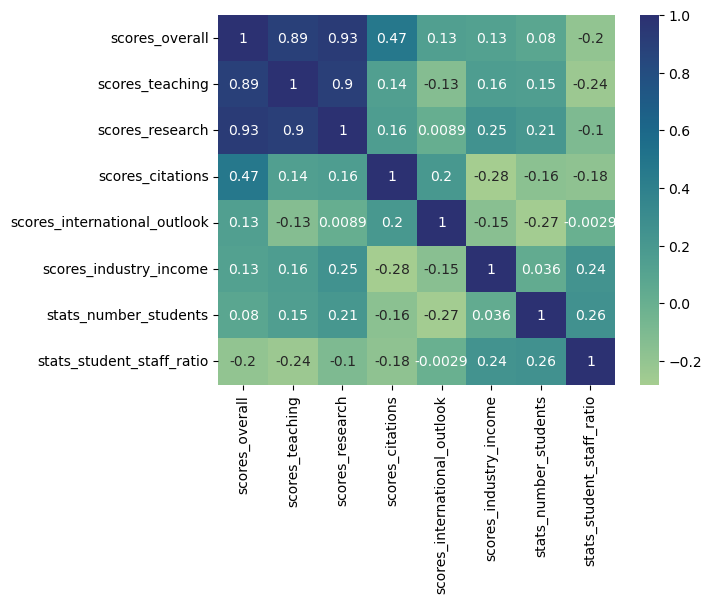

In [32]:
#plotar correlação entre os seis fatores considerados usando seaborn
import matplotlib.pyplot as plt
sns.heatmap(dados_2024.loc[:199,fatores_analisados].corr(), annot=True,cmap="crest")


In [33]:
##plotar correlação entre os seis fatores considerados usando plotly
fig = px.imshow(dados_2024.loc[:199,fatores_analisados].corr(),text_auto=True,color_continuous_scale='RdBu_r')
fig.show()

### Construção de rankings baseados em outros fatores

Função para criação de ranking de acordo com um dos seguintes indicadores:
 
 - teaching;
 - research;
 - citations;
 - international_outlook;
 - industry_income.

In [34]:
def ranking_fator_selecinado(dados,ano,fator,n_posicoes,overall_ranking='rank',name_universities='name',location='location'):
    '''
    Função para gerar uma ranking para o fator desejado

    Inputs:
        dados             - Pandas dataframe com os rankings para cada ano
        ano               - (str) ano selecionado para o qual o ranking será criado
        fator             - (str) nome do fator considerado na contrucao do ranking. Fatores aceitos são: 'scores_teaching_rank',
                                  'scores_international_outlook_rank','scores_industry_income_rank','scores_research_rank','scores_citations_rank'
        n_posicoes        - (int) número de posições no ranking gerado. Serão incluídas desde a posição 1 até n_posicões
        overall_ranking   - (str) nome da coluna do dataframe dados que contem a posição das universidade no ranking geral
        name_universities - (str) nome da coluna do dataframe dados que contem o nome das universidade
        location          - (str) nome da coluna no dataframe com os paises de origem das universidades

    
    '''
    if fator not in ['scores_teaching_rank','scores_international_outlook_rank','scores_industry_income_rank',
                    'scores_research_rank','scores_citations_rank']:
        raise Exception('Fator selecionador deve ser um dos seguintes: scores_international_outlook_rank,scores_teaching_rank,scores_international_outlook_rank,scores_industry_income_rank,scores_research_rank,scores_citations_rank')

    dados=dados.loc[ano,:] #selecionar o ano
    dados_ordenados=dados.sort_values(by=fator).reset_index(drop=True)
    dados_ordenados=dados_ordenados.loc[:(n_posicoes-1),[overall_ranking,name_universities,'location']] #ordenar os valores de acordo com o fator selecionado
    dados_ordenados.rename(columns={overall_ranking:'Ranking Geral',location:'Location',name_universities:'Top '+str(n_posicoes)+' '+fator.split('_')[1]},inplace=True)
    dados_ordenados.index=np.arange(1,n_posicoes+1) #index começando em zero
    return dados_ordenados

In [35]:
#Exemplo: 20 mlehores universidades de acordo com o critério pesquisa e suas posições no ranking geral
ranking_2024_research=ranking_fator_selecinado(df_dados,'2024','scores_research_rank',20)
ranking_2024_research

,Ranking Geral,Top 20 research,Location
1,1,University of Oxford,United Kingdom
2,6,Harvard University,United States
3,2,University of Cambridge,United Kingdom
4,=3,California Institute of Technology,United States
5,=3,Stanford University,United States
6,7,Princeton University,United States
7,30,Tsinghua University,China
8,=10,ETH Zurich,Switzerland
9,5,Massachusetts Institute of Technology,United States
10,9,The University of Chicago,United States


Função para criação de um dataframe com universidades em cada coluna rankeadas de acordo com os seguintes fatores:

 - geral
 - teaching;
 - research;
 - citations;
 - international_outlook;
 - industry_income.

In [36]:
def ranking_seis_fatores(dados,ano,n_posicoes,coluna_names='name'):
    """
    Função para crição de um dataframe com 6 colunas, em cala uma delas as universidade aparecem rankeadas de acordo com um dos 6 fatores:
        -Geral;
        -Teaching;
        -Research;
        -International outlook;
        -Industry income

    Inputs:
        dados        - Pandas dataframe com os rankings para todos os anos
        ano          - (str) Ranking relativos ao ano especificado
        n_posicoes   - (int) Número de posições que aparecerão no ranking
        coluna_names - (str) Nome da coluna com o nome das universidades

    Outpout:
        Pandas dataframe com 6 colunas,são elas:
            Ranking Geral: Universidade rankeadas de acordo com a média de todos os fatores (calculados pelo THE)
            Ranking Teaching: Universidades rankeadas de acordo com o score obtido para ensino
            Ranking Research: Universidade rankeadas de acordo com o score obtido para pesquisa
            Ranking International outlook: Universidade rankeadas de acordo com o score obtido para internacionalização
            Ranking Industry Income: Universidade rankeadas de acordo com o score obtido relação com indústria
    """
    #nome das colunas do dataframe original que serão usadas para criação dos rankings
    fatores=['scores_teaching_rank','scores_research_rank','scores_citations_rank','scores_international_outlook_rank','scores_industry_income_rank']

    name=['Geral','Teaching','Reasearch','Citations','International Outlook',"Industry Income"] #nome dos fatores como aparecerão no dataframe
    dados_ano_selecionado=df_dados.loc[ano,:] #seleção dos dados para o ano especificado
    ranking_fatores=dados_ano_selecionado.loc[:n_posicoes-1,['name']] #universidades ordenadas de acordo com overall ranking
    ranking_fatores.rename(columns={coluna_names: 'Ranking '+name[0]},inplace=True)
    for num,factor in enumerate(fatores):
        dados_fator=dados_ano_selecionado.sort_values(by=factor).reset_index(drop=True)
        dados_fator=dados_fator.loc[:n_posicoes-1,['name']]
        dados_fator.rename(columns={coluna_names:'Ranking '+name[num+1]},inplace=True)
        ranking_fatores=pd.concat([ranking_fatores,dados_fator],axis=1)
    ranking_fatores.index=np.arange(1,n_posicoes+1)
    return ranking_fatores

In [37]:
#Exemplo: Top 20 para o ano de 2024

top_20_2024=ranking_seis_fatores(df_dados,'2024',20)
top_20_2024

,Ranking Geral,Ranking Teaching,Ranking Reasearch,Ranking Citations,Ranking International Outlook,Ranking Industry Income
1,University of Oxford,California Institute of Technology,University of Oxford,Massachusetts Institute of Technology,University of Luxembourg,Duke University
2,University of Cambridge,Stanford University,Harvard University,"St George’s, University of London",Qatar University,Eindhoven University of Technology
3,California Institute of Technology,University of Cambridge,University of Cambridge,"University of California, Santa Cruz",University of Hong Kong,Federal University of Itajubá
4,Stanford University,Massachusetts Institute of Technology,California Institute of Technology,Stanford University,University of Sharjah,University of Freiburg
5,Massachusetts Institute of Technology,University of Oxford,Stanford University,"University of California, Berkeley",École Polytechnique Fédérale de Lausanne,Istanbul Technical University
6,Harvard University,Yale University,Princeton University,Brandeis University,University of Macau,Korea Advanced Institute of Science and Techno...
7,Princeton University,Princeton University,Tsinghua University,Carnegie Mellon University,University of Geneva,LMU Munich
8,Imperial College London,The University of Chicago,ETH Zurich,Harvard University,ETH Zurich,Peking University
9,The University of Chicago,Harvard University,Massachusetts Institute of Technology,Princeton University,Khalifa University,Technical University of Munich
10,ETH Zurich,University of Pennsylvania,The University of Chicago,California Institute of Technology,Alfaisal University,Wageningen University & Research


### Male & Female proportion 

In [38]:
#Função para plotar a distribuiação da proporção de homens ou mulheres nas universidades que entraram no ranking das melhores no ano selecionados
#são gerados dois gráficos, um histograma e um boxplot
def grafico_male_female(dados,ano,tipo):
    '''
    Função para plotar um histograma e um boxplot com a proporção de homens ou mulheres nas universidaderes que entraram no ranking no ano selecionado

    Inputs:
        dados: (Pandas dataframe) conjunto de dados com os rankings para todos os anos
        ano:   (str) ano do ranking. Os dados estão disponíveis para os seguintes anos : 2012,2013,2014,2015,2017,2019,2020,2021,2023,2024
        tipo:  (str) male or female. Define se será plotada a proporção de homens ou mulheres
    Outputs: Histograma e boxplot com a proporção de homens ou mulheres nas universidades que entraram no ranking do ano selecionado 
    '''
    if ano not in ['2012','2013','2014','2015','2017','2019','2020','2021','2023','2024']:
        raise Exception(print('Os dados não estão disponíveis para o ano de {}'.format(ano)))
    coluna=tipo+' proportion' #nome da coluna
    sns.set_style("darkgrid") #estilo do gráfico
    num_universidades=dados.loc[ano,[coluna]].notna().sum().item() # número de universidades com dados disponíveis
    fig,axs=plt.subplots(nrows=2,ncols=1,figsize=(16,9))
    sns.histplot(data=dados.loc[ano,:],x=coluna,stat='frequency',ax=axs[0]) 
    sns.boxplot(data=df_dados.loc[ano,:],x=coluna,ax=axs[1])
    
    #Adicionar texto no gráfico com o ano do ranking e o número de universidades para as quais os dados estavam dispoiníveis
    props = dict(boxstyle='round', facecolor='gray', alpha=0.5)  #adiconar caixa de texto na cor selecionada
    axs[0].text(0.01, 0.99, 'Ano: {} \nNúmero de Universidades: {}'.format(ano,num_universidades), transform=axs[0].transAxes, fontsize=14,
    verticalalignment='top',horizontalalignment='left', bbox=props) #Adicionar o texto. As posições variam de 0 a 1.
    
    

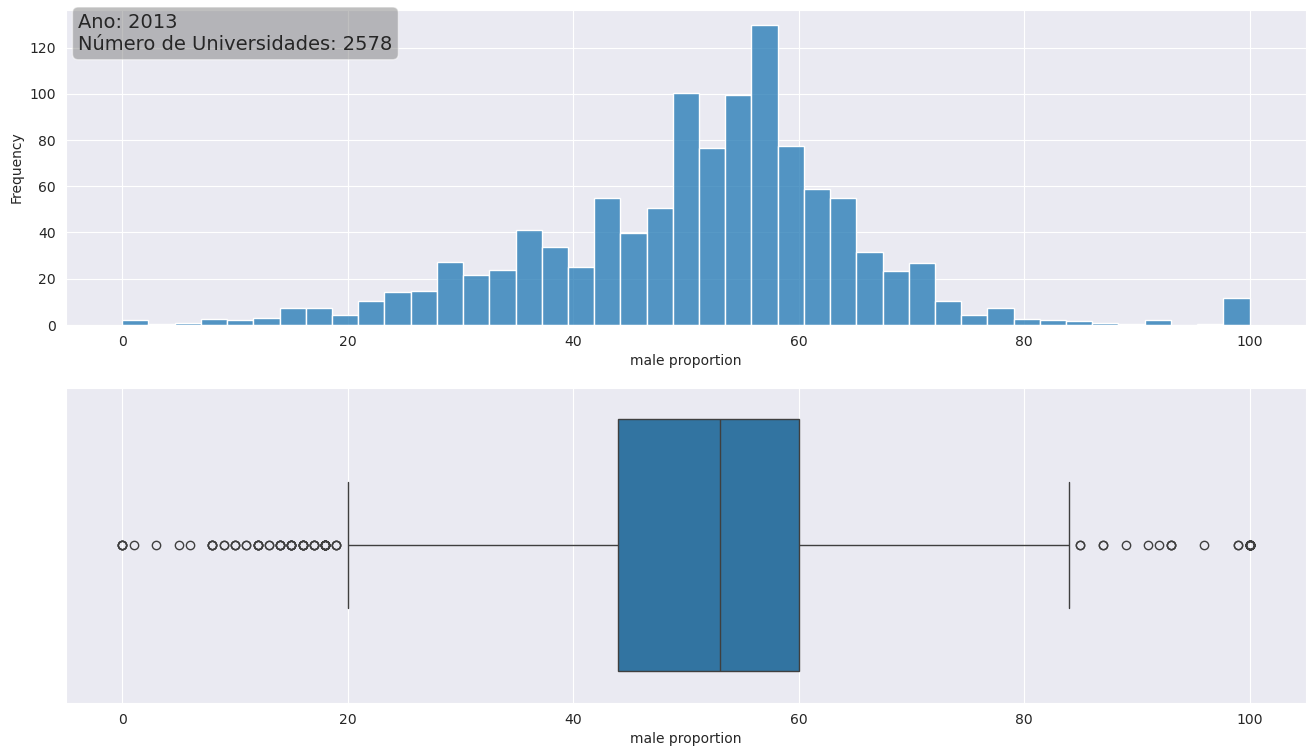

In [39]:
grafico_male_female(df_dados,'2013','male')

In [40]:
#Mediana da proporção de homens nas universidade que compõe cada ranking
df_ranking_completo_male_prop={'Ano':[],'Mediana da Proporção de Homens (%)':[], "Número de universidades": []}
for ano in anos:
    median_male_prop=df_dados.loc[ano,['male proportion']].median().item() #calculo da mediana
    num_total=df_dados.loc[ano,['male proportion']].notna().sum().item()   #número total de universidades, excluindo nan
    if num_total==0: #dados referentes ao male proportion 
        num_total='Dados indisponíveis'
        median_male_prop='Dados indisponíveis'
    df_ranking_completo_male_prop['Ano']+=[ano]
    df_ranking_completo_male_prop['Mediana da Proporção de Homens (%)']+=[median_male_prop]
    df_ranking_completo_male_prop["Número de universidades"]+=[num_total]
df_ranking_completo_male_prop=pd.DataFrame.from_dict(df_ranking_completo_male_prop)
df_ranking_completo_male_prop

,Ano,Mediana da Proporção de Homens (%),Número de universidades
0,2011,Dados indisponíveis,Dados indisponíveis
1,2012,52.0,1202
2,2013,53.0,2578
3,2014,Dados indisponíveis,Dados indisponíveis
4,2015,52.0,748
5,2016,Dados indisponíveis,Dados indisponíveis
6,2017,53.0,2255
7,2018,Dados indisponíveis,Dados indisponíveis
8,2019,52.0,1331
9,2020,52.0,926


Interpretação:

- Para o ano de 2024 os dados a respeito de número de estudantes homens foram fornecidos por 1047 universidades. Dentre elas, em 523 a propoção de alunos homens era inferior a 52% enquanto nas restantes era superior. A proporção de 52% é a mediana para o ano de 2024. Essa mediana permanece praticamente estável desde 2011, variando entre 52 e 53%.



In [41]:
#Mediana da proporção de homens nas universidade que compõe o top 10 de cada ranking
df_ranking_top10_male_prop={'Ano':[],'Mediana da Proporção de Homens (%)':[], "Número de universidades": []}
for ano in anos:
    median_male_prop=df_dados.loc[(ano,slice(0,9)),['male proportion']].median().item() #calculo da mediana para as universidade no top 10
    num_total=df_dados.loc[(ano,slice(0,9)),['male proportion']].notna().sum().item()   #número de universidades, excluindo nan
    if num_total==0: #dados referentes ao male proportion 
        num_total='Dados indisponíveis'
        median_male_prop='Dados indisponíveis'
    df_ranking_top10_male_prop['Ano']+=[ano]
    df_ranking_top10_male_prop['Mediana da Proporção de Homens (%)']+=[median_male_prop]
    df_ranking_top10_male_prop["Número de universidades"]+=[num_total]
df_ranking_top10_male_prop=pd.DataFrame.from_dict(df_ranking_top10_male_prop)
df_ranking_top10_male_prop


,Ano,Mediana da Proporção de Homens (%),Número de universidades
0,2011,Dados indisponíveis,Dados indisponíveis
1,2012,44.5,10
2,2013,47.5,10
3,2014,Dados indisponíveis,Dados indisponíveis
4,2015,42.0,9
5,2016,Dados indisponíveis,Dados indisponíveis
6,2017,46.5,10
7,2018,Dados indisponíveis,Dados indisponíveis
8,2019,45.5,10
9,2020,42.0,9


Interpretação:

- Quando todas as universidades são consideradas, mais da metade delas tem maior proporção de alunos homens. Porém quando são consideradas somente as universidades no top 10, a maior parte
delas tem maior proporção de alunos do sexo feminino.

In [42]:
#comparativos da mediana das proporções de homens para universidades no top 10 e no top 100
df_comparativo_male_prop={'Ano':[],'Mediana da Proporção de Homens (Top 10))':[], 'Mediana da Proporção de Homens (Top 100))':[]}
for ano in anos:
    median_top10=df_dados.loc[(ano,slice(0,9)),['male proportion']].median().item() #calculo da mediana para as universidade no top 10
    median_top100=df_dados.loc[(ano,slice(0,99)),['male proportion']].median().item() #calculo da mediana para as universidade no top 100
    num_total=df_dados.loc[(ano,slice(0,9)),['male proportion']].notna().sum().item()   #número de universidades, excluindo nan
    if num_total==0: #dados referentes ao male proportion 
        median_top100='Dados indisponíveis'
        median_top10='Dados indisponíveis'
    df_comparativo_male_prop['Ano']+=[ano]
    df_comparativo_male_prop['Mediana da Proporção de Homens (Top 10))']+=[median_top10]
    df_comparativo_male_prop['Mediana da Proporção de Homens (Top 100))']+=[median_top100]
df_comparativo_male_prop=pd.DataFrame.from_dict(df_comparativo_male_prop)
df_comparativo_male_prop


,Ano,Mediana da Proporção de Homens (Top 10)),Mediana da Proporção de Homens (Top 100))
0,2011,Dados indisponíveis,Dados indisponíveis
1,2012,44.5,52.0
2,2013,47.5,52.0
3,2014,Dados indisponíveis,Dados indisponíveis
4,2015,42.0,52.0
5,2016,Dados indisponíveis,Dados indisponíveis
6,2017,46.5,53.0
7,2018,Dados indisponíveis,Dados indisponíveis
8,2019,45.5,52.0
9,2020,42.0,51.0


Interpretação:

- A maior parte das universidades que compõe o top 100 ao longo dos anos tem maior propoção de alunos do sexo masculino. Porém quando são consideradas somente universidades no top 10, a situação se inverte. 

### Number of Students


In [55]:
#Universidade que entraram no top 10 que tem o maior número de alunos
ano='2024'
df_dados.loc[ano,['rank','name','location','stats_number_students']].sort_values(by='stats_number_students',ascending=False).head(20)

,rank,name,location,stats_number_students
1004,1001+,Anadolu University,Turkey,1824383.0
828,801–1000,Cairo University,Egypt,252095.0
964,801–1000,University of South Africa,South Africa,184432.0
1041,1001+,Instituto Politécnico Nacional (IPN),Mexico,173868.0
807,801–1000,Alexandria University,Egypt,166350.0
721,601–800,National Autonomous University of Mexico,Mexico,145024.0
804,801–1000,Ain Shams University,Egypt,131200.0
1036,1001+,University of Guadalajara,Mexico,118665.0
336,301–350,Sapienza University of Rome,Italy,111453.0
902,801–1000,Mansoura University,Egypt,109714.0


Comentários para o ranking de 2024:

- Dentre as 20 maiores universidades em número de alunos, 17 delas estão em países de 3° mundo;
- A maior universidade européia está na Itália;
- A USP é a maior universidade da América do Sul, equanto o México tem a maior universidade do continente;
- Os EStados Unidos tem 157 universidades no ranking, mas nenhuma dentre as 20 com maior número de alunos.


In [54]:
#Numero de alunos nas universidade melhores colocadas
df_dados.loc[ano,['rank','name','location','stats_number_students']].head(10)

,rank,name,location,stats_number_students
0,1,University of Oxford,United Kingdom,19720.0
1,2,California Institute of Technology,United States,2181.0
2,3,Stanford University,United States,15658.0
3,4,University of Cambridge,United Kingdom,18605.0
4,5,Massachusetts Institute of Technology,United States,11192.0
5,6,Harvard University,United States,19890.0
6,7,Princeton University,United States,7925.0
7,8,Imperial College London,United Kingdom,15235.0
8,9,ETH Zurich,Switzerland,18616.0
9,=10,"University of California, Berkeley",United States,34834.0


### Student Staff Ratio

In [65]:
ano='2024'
df_dados.loc[ano,['rank','name','location','stats_student_staff_ratio']].sort_values(by='stats_student_staff_ratio').head(20)

,rank,name,location,stats_student_staff_ratio
886,801–1000,The Jikei University School of Medicine,Japan,0.6
281,251–300,Oregon Health and Science University,United States,1.0
890,801–1000,Kansai Medical University,Japan,1.1
947,801–1000,Saitama Medical University,Japan,1.5
335,301–350,Rush University,United States,2.1
454,401–500,University of Nebraska Medical Center,United States,2.4
959,801–1000,Showa University,Japan,2.4
275,251–300,Medical University of Vienna,Austria,2.7
954,801–1000,Shiga University of Medical Science,Japan,3.0
530,501–600,Fujita Health University,Japan,3.1


Comentários para o ranking de 2024:

- Dentre as 20 universidade com menores porporções entre alunos e funcionários, 11 delas estão no Japão;
- A Jikei University School of Medicine	tem mais funcionários que alunos;
- A maior parte das universidade com elevadas proporções de funcionários em relação a alunos são da área de saúde.